In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split  
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import itertools
from sklearn.model_selection import KFold
%matplotlib inline
import itertools
import csv

In [2]:
mushroom = pd.read_csv("mushroom_numerical.csv", sep=',')
mushroom.head()

,Cap-shape,Cap-surface,Cap-color,Bruises,Odor,Gill-attachment,Gill-spacing,Gill-size,Gill-color,Stalk-shape,...,Stalk-color-above-ring,Stalk-color-below-ring,Veil-type,Veil-color,Ring-number,Ring-type,Spore-print-color,Population,Habitat,Class
0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,2,0,0,0,0,p
1,0,0,1,1,1,0,0,1,0,0,...,0,0,1,0,2,0,1,1,1,e
2,1,0,2,1,2,0,0,1,1,0,...,0,0,1,0,2,0,1,1,2,e
3,0,1,2,1,0,0,0,0,1,0,...,0,0,1,0,2,0,0,0,0,p
4,0,0,3,0,3,0,1,1,0,1,...,0,0,1,0,2,1,1,2,1,e


In [3]:
appendicitis = pd.read_csv("appendicitis.csv", sep=',')
appendicitis.head()

,At1,At2,At3,At4,At5,At6,At7,Class
0,0.213,0.554,0.207,0.000,0.000,0.749,0.220,1
1,0.458,0.714,0.468,0.111,0.102,0.741,0.436,1
2,0.102,0.518,0.111,0.056,0.022,0.506,0.086,1
3,0.187,0.196,0.105,0.056,0.029,0.133,0.085,1
4,0.236,0.804,0.289,0.111,0.066,0.756,0.241,1


In [4]:
Glass = pd.read_csv("Glass.csv")
Glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [5]:
print(mushroom.shape)
print(mushroom.groupby('Class').size())

(5644, 23)
Class
e    3488
p    2156
dtype: int64


In [6]:
print(appendicitis.shape)
print(appendicitis.groupby('Class').size())

(106, 8)
Class
0    85
1    21
dtype: int64


In [7]:
print(Glass.shape)
print(Glass.groupby("Class").size())

(214, 10)
Class
1    70
2    76
3    17
5    13
6     9
7    29
dtype: int64


In [8]:
data_mushroom = mushroom.iloc[:,0:22]
labels_mushroom = mushroom.iloc[:,22].astype(str)

In [9]:
# x = data_nursery.values.astype(np.float32) #returns a numpy array
# min_max_scaler = MinMaxScaler()
# x_scaled = min_max_scaler.fit_transform(x)
# df = pd.DataFrame(x_scaled)
# nursery = pd.concat([df, labels_nursery], axis=1)

In [10]:
data_appendicitis = appendicitis.iloc[:,0:7]
labels_appendicitis = appendicitis.iloc[:,7].astype(str)
print (data_appendicitis)

       At1    At2    At3    At4    At5    At6    At7
0    0.213  0.554  0.207  0.000  0.000  0.749  0.220
1    0.458  0.714  0.468  0.111  0.102  0.741  0.436
2    0.102  0.518  0.111  0.056  0.022  0.506  0.086
3    0.187  0.196  0.105  0.056  0.029  0.133  0.085
4    0.236  0.804  0.289  0.111  0.066  0.756  0.241
5    0.116  0.161  0.057  0.333  0.140  0.177  0.049
6    0.089  0.179  0.045  0.028  0.011  0.168  0.032
7    0.364  0.661  0.365  0.319  0.250  0.743  0.353
8    0.191  0.661  0.214  0.042  0.022  0.448  0.145
9    0.120  0.250  0.076  0.125  0.053  0.224  0.059
10   0.058  0.589  0.087  0.583  0.196  0.576  0.060
11   0.071  0.321  0.057  0.069  0.025  0.129  0.016
12   1.000  0.768  1.000  0.028  0.047  0.878  1.000
13   0.204  0.268  0.132  0.000  0.000  0.149  0.098
14   0.000  0.232  0.000  0.000  0.000  0.421  0.000
15   0.364  0.786  0.408  0.042  0.033  0.710  0.344
16   0.187  0.411  0.153  0.056  0.029  0.322  0.119
17   0.378  0.732  0.402  0.278  0.223  0.687 

In [11]:
# x = data_poker.values.astype(np.float32) #returns a numpy array
# min_max_scaler = MinMaxScaler()
# x_scaled = min_max_scaler.fit_transform(x)
# df = pd.DataFrame(x_scaled)
# poker2 = pd.concat([df, labels_poker], axis=1)

In [12]:
data_Glass = Glass.iloc[:,0:9]
labels_Glass = Glass.iloc[:,9].astype(str)

In [13]:
# x = data_market.values.astype(np.float32) #returns a numpy array
# min_max_scaler = MinMaxScaler()
# x_scaled = min_max_scaler.fit_transform(x)
# df = pd.DataFrame(x_scaled)
# market = pd.concat([df, labels_market], axis=1)

In [14]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [15]:
kf = KFold(n_splits=2, shuffle=True)

## SVM for Mushroom Dataset

              precision    recall  f1-score   support

           e       1.00      1.00      1.00      1733
           p       1.00      1.00      1.00      1089

   micro avg       1.00      1.00      1.00      2822
   macro avg       1.00      1.00      1.00      2822
weighted avg       1.00      1.00      1.00      2822

accuracy:  1.0


/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


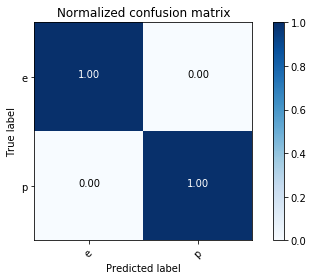

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


              precision    recall  f1-score   support

           e       1.00      1.00      1.00      1755
           p       1.00      0.99      1.00      1067

   micro avg       1.00      1.00      1.00      2822
   macro avg       1.00      1.00      1.00      2822
weighted avg       1.00      1.00      1.00      2822

accuracy:  0.9975194897236003


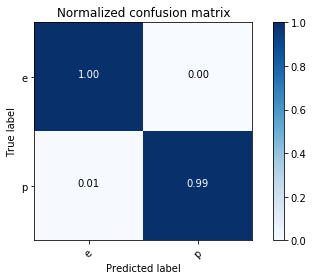

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


              precision    recall  f1-score   support

           e       1.00      1.00      1.00      1766
           p       1.00      1.00      1.00      1056

   micro avg       1.00      1.00      1.00      2822
   macro avg       1.00      1.00      1.00      2822
weighted avg       1.00      1.00      1.00      2822

accuracy:  1.0


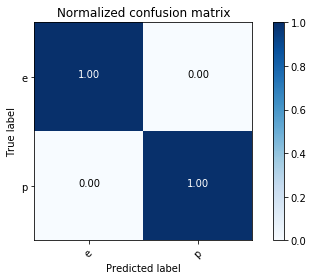

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


              precision    recall  f1-score   support

           e       1.00      1.00      1.00      1722
           p       1.00      1.00      1.00      1100

   micro avg       1.00      1.00      1.00      2822
   macro avg       1.00      1.00      1.00      2822
weighted avg       1.00      1.00      1.00      2822

accuracy:  0.9996456413890857


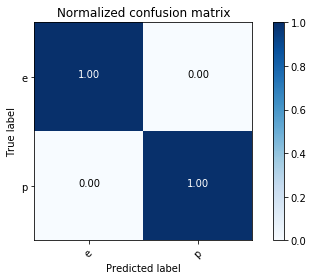

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


              precision    recall  f1-score   support

           e       1.00      1.00      1.00      1744
           p       1.00      1.00      1.00      1078

   micro avg       1.00      1.00      1.00      2822
   macro avg       1.00      1.00      1.00      2822
weighted avg       1.00      1.00      1.00      2822

accuracy:  1.0


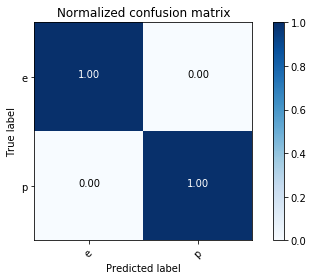

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


              precision    recall  f1-score   support

           e       1.00      1.00      1.00      1744
           p       1.00      1.00      1.00      1078

   micro avg       1.00      1.00      1.00      2822
   macro avg       1.00      1.00      1.00      2822
weighted avg       1.00      1.00      1.00      2822

accuracy:  0.9996456413890857


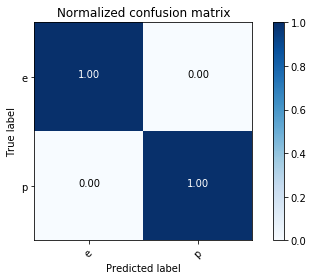

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


              precision    recall  f1-score   support

           e       1.00      1.00      1.00      1716
           p       1.00      1.00      1.00      1106

   micro avg       1.00      1.00      1.00      2822
   macro avg       1.00      1.00      1.00      2822
weighted avg       1.00      1.00      1.00      2822

accuracy:  1.0


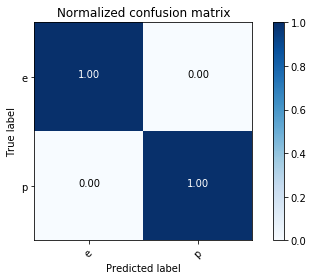

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


              precision    recall  f1-score   support

           e       1.00      1.00      1.00      1772
           p       1.00      1.00      1.00      1050

   micro avg       1.00      1.00      1.00      2822
   macro avg       1.00      1.00      1.00      2822
weighted avg       1.00      1.00      1.00      2822

accuracy:  1.0


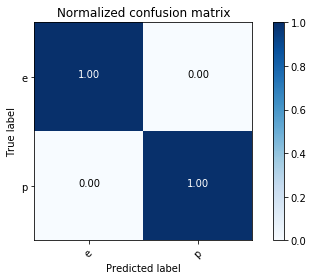

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


              precision    recall  f1-score   support

           e       1.00      1.00      1.00      1744
           p       1.00      1.00      1.00      1078

   micro avg       1.00      1.00      1.00      2822
   macro avg       1.00      1.00      1.00      2822
weighted avg       1.00      1.00      1.00      2822

accuracy:  0.9989369241672572


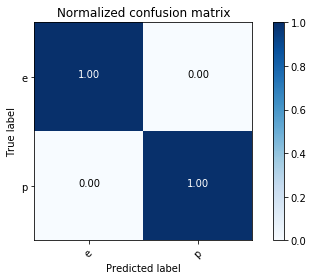

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


              precision    recall  f1-score   support

           e       1.00      1.00      1.00      1744
           p       1.00      1.00      1.00      1078

   micro avg       1.00      1.00      1.00      2822
   macro avg       1.00      1.00      1.00      2822
weighted avg       1.00      1.00      1.00      2822

accuracy:  1.0


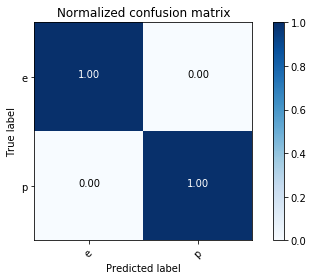

In [16]:
acc=[]
acc.append("Mushroom")
for i in range(5):
    for train_index, test_index in kf.split(mushroom):
        X_train, X_test = data_mushroom.iloc[train_index], data_mushroom.iloc[test_index]
        y_train, y_test = labels_mushroom[train_index], labels_mushroom[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        svm = SVC()
        svm.fit(X_train, y_train)
        predicted = svm.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            #print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        acc.append(accuracy_score(y_test, predicted))
        print (classification_report(y_test, predicted, target_names=unique_labels))
        print ("accuracy: ", accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

## SVM for Appendicitis Dataset

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


              precision    recall  f1-score   support

           0       0.90      1.00      0.95        47
           1       1.00      0.17      0.29         6

   micro avg       0.91      0.91      0.91        53
   macro avg       0.95      0.58      0.62        53
weighted avg       0.91      0.91      0.87        53

accuracy:  0.9056603773584906


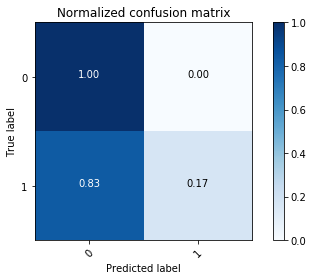

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.72      1.00      0.84        38
           1       0.00      0.00      0.00        15

   micro avg       0.72      0.72      0.72        53
   macro avg       0.36      0.50      0.42        53
weighted avg       0.51      0.72      0.60        53

accuracy:  0.7169811320754716


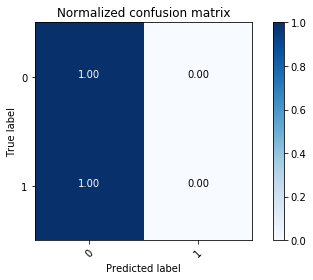

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.83      1.00      0.91        44
           1       0.00      0.00      0.00         9

   micro avg       0.83      0.83      0.83        53
   macro avg       0.42      0.50      0.45        53
weighted avg       0.69      0.83      0.75        53

accuracy:  0.8301886792452831


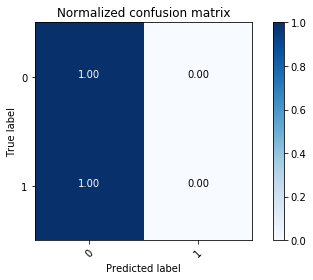

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.77      1.00      0.87        41
           1       0.00      0.00      0.00        12

   micro avg       0.77      0.77      0.77        53
   macro avg       0.39      0.50      0.44        53
weighted avg       0.60      0.77      0.67        53

accuracy:  0.7735849056603774


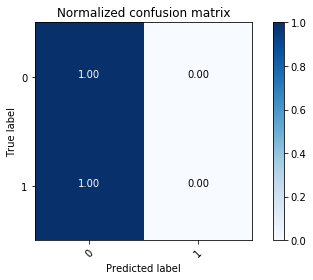

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.74      1.00      0.85        39
           1       0.00      0.00      0.00        14

   micro avg       0.74      0.74      0.74        53
   macro avg       0.37      0.50      0.42        53
weighted avg       0.54      0.74      0.62        53

accuracy:  0.7358490566037735


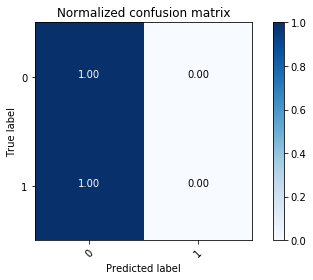

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


              precision    recall  f1-score   support

           0       0.91      0.93      0.92        46
           1       0.50      0.43      0.46         7

   micro avg       0.87      0.87      0.87        53
   macro avg       0.71      0.68      0.69        53
weighted avg       0.86      0.87      0.86        53

accuracy:  0.8679245283018868


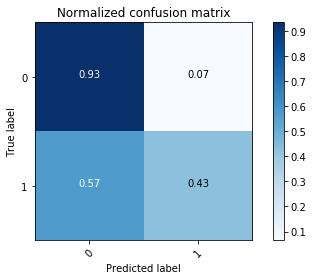

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.77      1.00      0.87        41
           1       0.00      0.00      0.00        12

   micro avg       0.77      0.77      0.77        53
   macro avg       0.39      0.50      0.44        53
weighted avg       0.60      0.77      0.67        53

accuracy:  0.7735849056603774


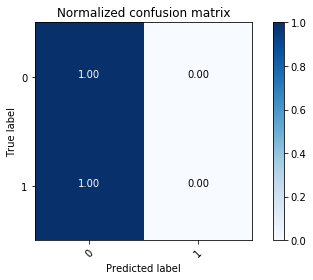

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


              precision    recall  f1-score   support

           0       0.86      0.98      0.91        44
           1       0.67      0.22      0.33         9

   micro avg       0.85      0.85      0.85        53
   macro avg       0.76      0.60      0.62        53
weighted avg       0.83      0.85      0.82        53

accuracy:  0.8490566037735849


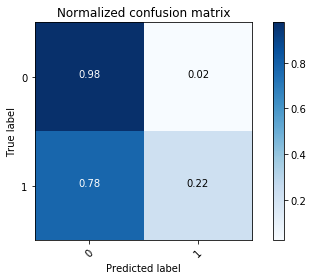

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.74      1.00      0.85        39
           1       0.00      0.00      0.00        14

   micro avg       0.74      0.74      0.74        53
   macro avg       0.37      0.50      0.42        53
weighted avg       0.54      0.74      0.62        53

accuracy:  0.7358490566037735


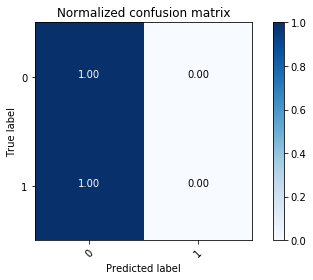

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


              precision    recall  f1-score   support

           0       0.90      0.93      0.91        46
           1       0.40      0.29      0.33         7

   micro avg       0.85      0.85      0.85        53
   macro avg       0.65      0.61      0.62        53
weighted avg       0.83      0.85      0.84        53

accuracy:  0.8490566037735849


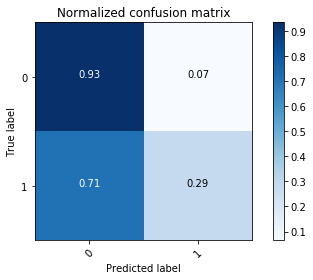

In [17]:
acc.append("Appendicitis")
for i in range(5):
    for train_index, test_index in kf.split(appendicitis):
        X_train, X_test = data_appendicitis.iloc[train_index], data_appendicitis.iloc[test_index]
        y_train, y_test = labels_appendicitis[train_index], labels_appendicitis[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        svm = SVC()
        svm.fit(X_train, y_train)
        predicted = svm.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            #print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        acc.append(accuracy_score(y_test, predicted))
        print (classification_report(y_test, predicted, target_names=unique_labels))
        print ("accuracy: ", accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

## SVM for Glass Dataset

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.93      0.30      0.46        43
           5       0.42      0.97      0.59        35
           7       0.00      0.00      0.00         5
           3       1.00      0.25      0.40         8
           2       0.00      0.00      0.00         5
           6       0.91      0.91      0.91        11

   micro avg       0.55      0.55      0.55       107
   macro avg       0.54      0.41      0.39       107
weighted avg       0.68      0.55      0.50       107

accuracy:  0.5514018691588785


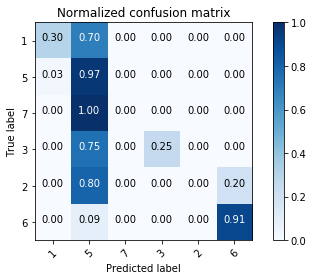

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.42      0.78      0.55        27
           5       0.68      0.56      0.61        41
           7       0.00      0.00      0.00        12
           3       0.71      1.00      0.83         5
           2       0.00      0.00      0.00         4
           6       1.00      0.72      0.84        18

   micro avg       0.58      0.58      0.58       107
   macro avg       0.47      0.51      0.47       107
weighted avg       0.57      0.58      0.55       107

accuracy:  0.5794392523364486


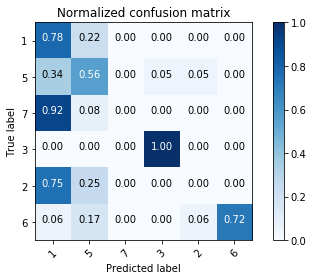

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.61      0.84      0.71        32
           5       0.52      0.65      0.58        34
           7       0.00      0.00      0.00         9
           3       0.50      0.57      0.53         7
           2       0.00      0.00      0.00         5
           6       1.00      0.65      0.79        20

   micro avg       0.62      0.62      0.62       107
   macro avg       0.44      0.45      0.44       107
weighted avg       0.57      0.62      0.58       107

accuracy:  0.616822429906542


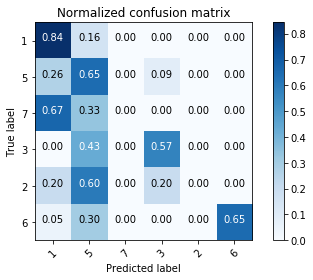

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.56      0.37      0.44        38
           5       0.54      0.90      0.67        42
           7       0.00      0.00      0.00         8
           3       1.00      0.33      0.50         6
           2       0.00      0.00      0.00         4
           6       1.00      1.00      1.00         9

   micro avg       0.59      0.59      0.59       107
   macro avg       0.52      0.43      0.44       107
weighted avg       0.55      0.59      0.53       107

accuracy:  0.5887850467289719


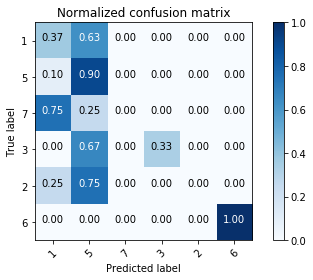

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.48      0.94      0.64        34
           5       0.48      0.38      0.43        39
           7       0.00      0.00      0.00        10
           3       1.00      0.17      0.29         6
           2       0.00      0.00      0.00         4
           6       1.00      0.64      0.78        14

   micro avg       0.53      0.53      0.53       107
   macro avg       0.49      0.36      0.36       107
weighted avg       0.52      0.53      0.48       107

accuracy:  0.5327102803738317


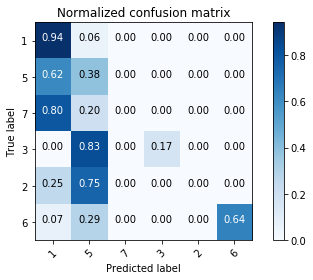

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.56      0.28      0.37        36
           5       0.48      0.86      0.62        37
           7       0.00      0.00      0.00         7
           3       0.50      0.57      0.53         7
           2       0.00      0.00      0.00         5
           6       0.93      0.93      0.93        15

   micro avg       0.56      0.56      0.56       107
   macro avg       0.41      0.44      0.41       107
weighted avg       0.52      0.56      0.51       107

accuracy:  0.5607476635514018


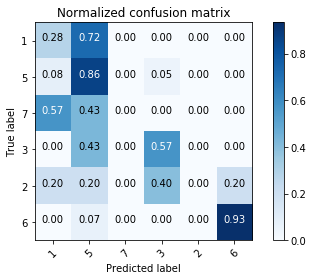

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.60      0.62      0.61        39
           5       0.51      0.76      0.61        37
           7       0.00      0.00      0.00         8
           3       1.00      0.11      0.20         9
           2       0.00      0.00      0.00         3
           6       0.90      0.82      0.86        11

   micro avg       0.58      0.58      0.58       107
   macro avg       0.50      0.38      0.38       107
weighted avg       0.57      0.58      0.54       107

accuracy:  0.5794392523364486


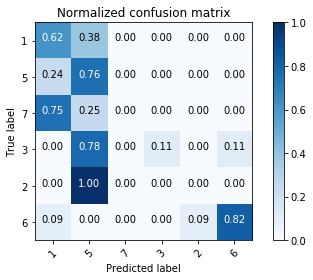

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.62      0.68      0.65        31
           5       0.59      0.69      0.64        39
           7       0.00      0.00      0.00         9
           3       0.23      0.75      0.35         4
           2       0.00      0.00      0.00         6
           6       1.00      0.78      0.88        18

   micro avg       0.61      0.61      0.61       107
   macro avg       0.41      0.48      0.42       107
weighted avg       0.57      0.61      0.58       107

accuracy:  0.6074766355140186


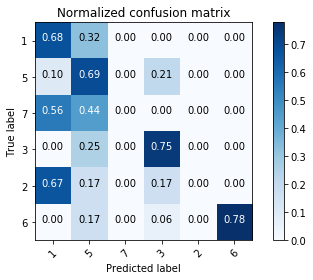

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.50      0.27      0.35        37
           5       0.44      0.82      0.57        38
           7       0.00      0.00      0.00        11
           3       0.33      0.75      0.46         4
           2       0.00      0.00      0.00         5
           6       1.00      0.58      0.74        12

   micro avg       0.48      0.48      0.48       107
   macro avg       0.38      0.40      0.35       107
weighted avg       0.45      0.48      0.42       107

accuracy:  0.4766355140186916


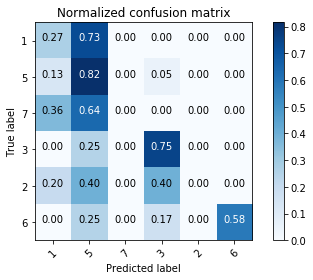

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.56      0.82      0.67        33
           5       0.61      0.66      0.63        38
           7       0.00      0.00      0.00         6
           3       1.00      0.22      0.36         9
           2       0.00      0.00      0.00         4
           6       0.88      0.82      0.85        17

   micro avg       0.64      0.64      0.64       107
   macro avg       0.51      0.42      0.42       107
weighted avg       0.61      0.64      0.60       107

accuracy:  0.6355140186915887


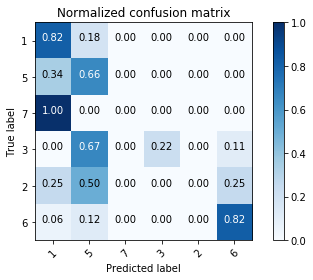

In [18]:
acc.append("Glass")
for i in range(5):
    for train_index, test_index in kf.split(Glass):
        X_train, X_test = data_Glass.iloc[train_index], data_Glass.iloc[test_index]
        y_train, y_test = labels_Glass[train_index], labels_Glass[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        svm = SVC()
        svm.fit(X_train, y_train)
        predicted = svm.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            #print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        acc.append(accuracy_score(y_test, predicted))
        print (classification_report(y_test, predicted, target_names=unique_labels))
        print ("accuracy: ", accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

In [19]:
print (acc)

['Mushroom', 1.0, 0.9975194897236003, 1.0, 0.9996456413890857, 1.0, 0.9996456413890857, 1.0, 1.0, 0.9989369241672572, 1.0, 'Appendicitis', 0.9056603773584906, 0.7169811320754716, 0.8301886792452831, 0.7735849056603774, 0.7358490566037735, 0.8679245283018868, 0.7735849056603774, 0.8490566037735849, 0.7358490566037735, 0.8490566037735849, 'Glass', 0.5514018691588785, 0.5794392523364486, 0.616822429906542, 0.5887850467289719, 0.5327102803738317, 0.5607476635514018, 0.5794392523364486, 0.6074766355140186, 0.4766355140186916, 0.6355140186915887]


In [20]:
with open("accSVMWithoutNoise.csv", 'w') as myfile:
    wr = csv.writer(myfile, delimiter='\n')
    wr.writerow(acc)